## Question

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


#### Data Description :

+ Undergrad : person is under graduated or not
+ Marital.Status : marital status of a person
+ Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
+ Work Experience : Work experience of an individual person
+ Urban : Whether that person belongs to urban area or not

#### Data Understanding

In [3]:
data.shape

(600, 6)

In [4]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


#### Data Pre-processing

In [9]:
Fraud_data=data.copy()

In [10]:
# Use the `rename()` method to change column names
Fraud_data.rename(columns={
    'Marital.Status': 'MaritalStatus',
    'Taxable.Income': 'TaxableIncome',
    'City.Population': 'CityPopulation',
    'Work.Experience': 'WorkExperience'
}, inplace=True)

In [11]:
Fraud_data.head(3)

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


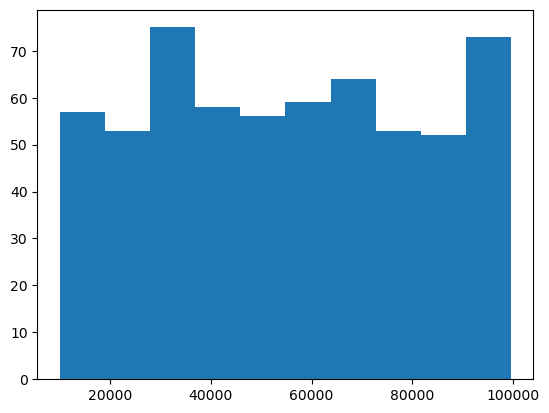

In [12]:
plt.hist('TaxableIncome',data=Fraud_data)
plt.show()

**Converting taxableIncome <= 30000 as "Risky" and others are "Good"**

In [13]:
Fraud_data['taxable_category']=pd.cut(x=Fraud_data['TaxableIncome'],bins=[10002,30000,99620],labels=['Risky', 'Good'])

In [14]:
Fraud_data.taxable_category.value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [15]:
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Undergrad         600 non-null    object  
 1   MaritalStatus     600 non-null    object  
 2   TaxableIncome     600 non-null    int64   
 3   CityPopulation    600 non-null    int64   
 4   WorkExperience    600 non-null    int64   
 5   Urban             600 non-null    object  
 6   taxable_category  600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


In [16]:
categorical_features=Fraud_data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'MaritalStatus', 'Urban', 'taxable_category'], dtype='object')

In [17]:
numerical_features=Fraud_data.describe(include=["int64","float64"]).columns
numerical_features

Index(['TaxableIncome', 'CityPopulation', 'WorkExperience'], dtype='object')

In [18]:
from scipy import stats

# Calculate Z-scores for each specified column
z_scores=pd.DataFrame()
for column in numerical_features:
    z_scores[column] = np.abs(stats.zscore(Fraud_data[column]))

# Define a threshold for identifying outliers (e.g., Z-score greater than 3)
threshold=3

# Identify outliers based on the threshold
outliers=(z_scores > threshold)

# Count the number of outliers in each column
outlier_counts=outliers.sum()

# Print the columns with the number of outliers
print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
TaxableIncome     0
CityPopulation    0
WorkExperience    0
dtype: int64


#### Data Visulaization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

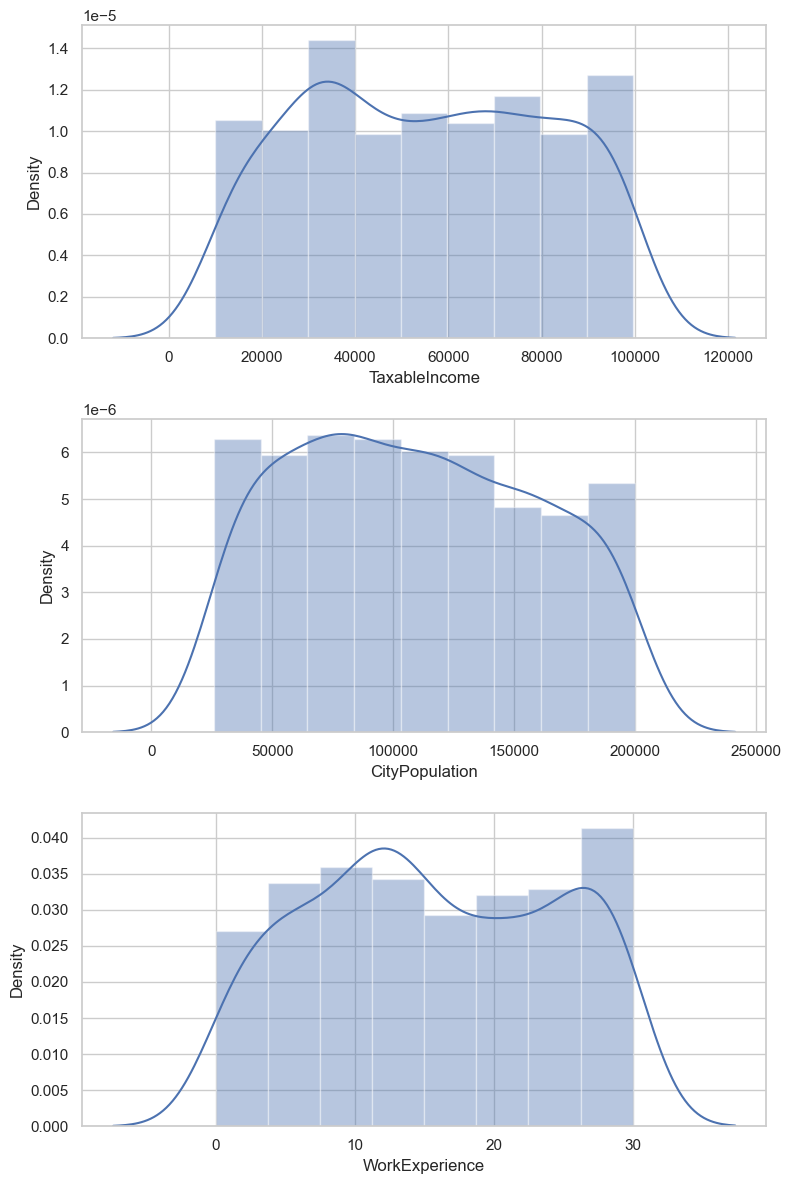

In [19]:
# Set the style for the plots (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create subplots for each numerical feature
fig,axes=plt.subplots(nrows=len(numerical_features),ncols=1,figsize=(8,12))
for i,column in enumerate(numerical_features):
    sns.distplot(Fraud_data[column],ax=axes[i],kde=True)  # Create a distplot for the current column
    axes[i].set_xlabel(column)  # Set the x-axis label for the current subplot

plt.tight_layout()  # Adjust subplot layout for readability
plt.show()

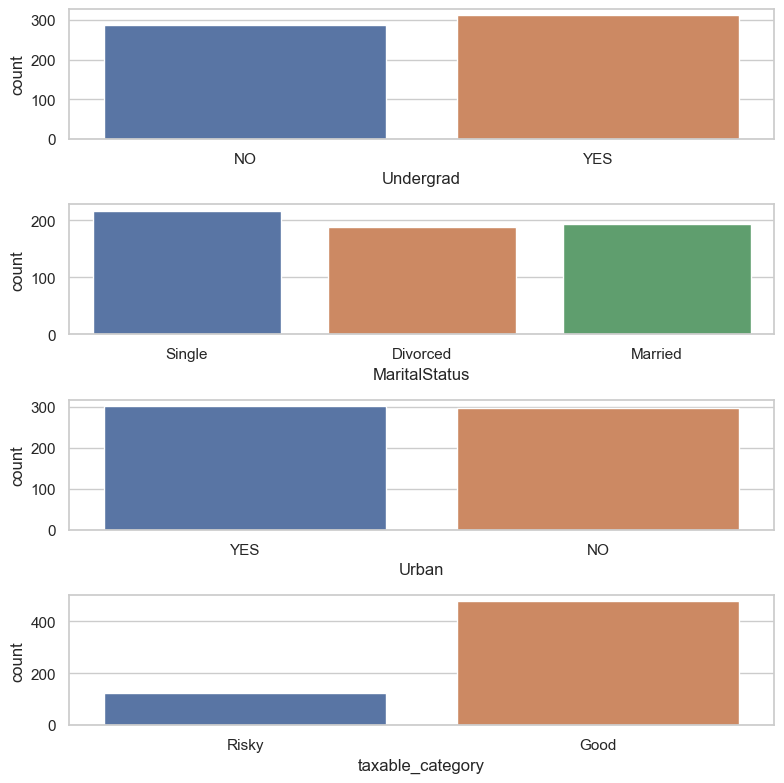

In [20]:
# Set the style for the plots (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create subplots for each categorical feature
fig,axes=plt.subplots(nrows=len(categorical_features),ncols=1,figsize=(8,8))
for i,column in enumerate(categorical_features):
    sns.countplot(data=Fraud_data,x=column,ax=axes[i])  # Create a count plot for the current column
    axes[i].set_xlabel(column)  # Set the x-axis label for the current subplot

plt.tight_layout()  # Adjust subplot layout for readability
plt.show()

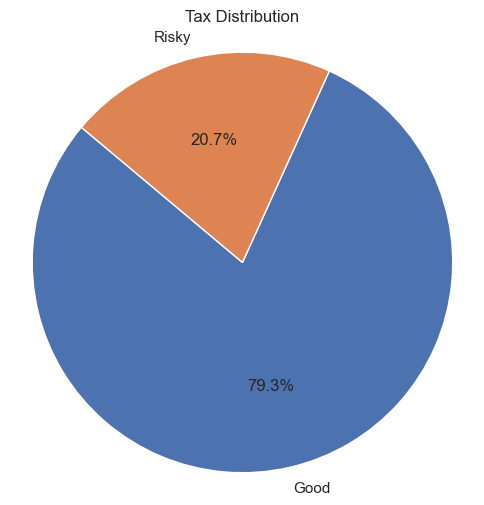

In [21]:
# Calculate the distribution of 'SalesCategory' values
category_counts=Fraud_data['taxable_category'].value_counts()

# Extract labels and sizes for the pie chart
labels=category_counts.index
sizes=category_counts.values

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('Tax Distribution')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

<AxesSubplot:>

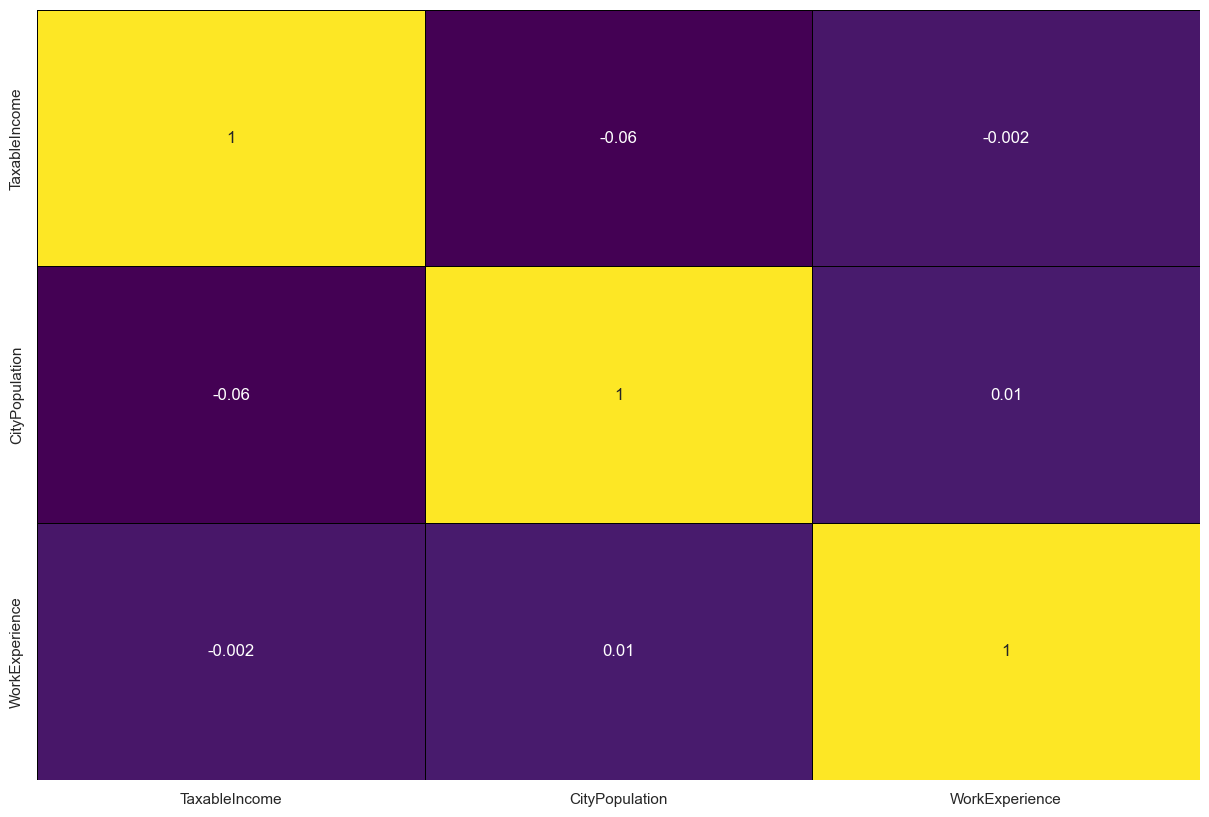

In [22]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(Fraud_data.corr(),annot=True,fmt='.1g',cmap="viridis",cbar=False,linewidths=0.5,linecolor='black')

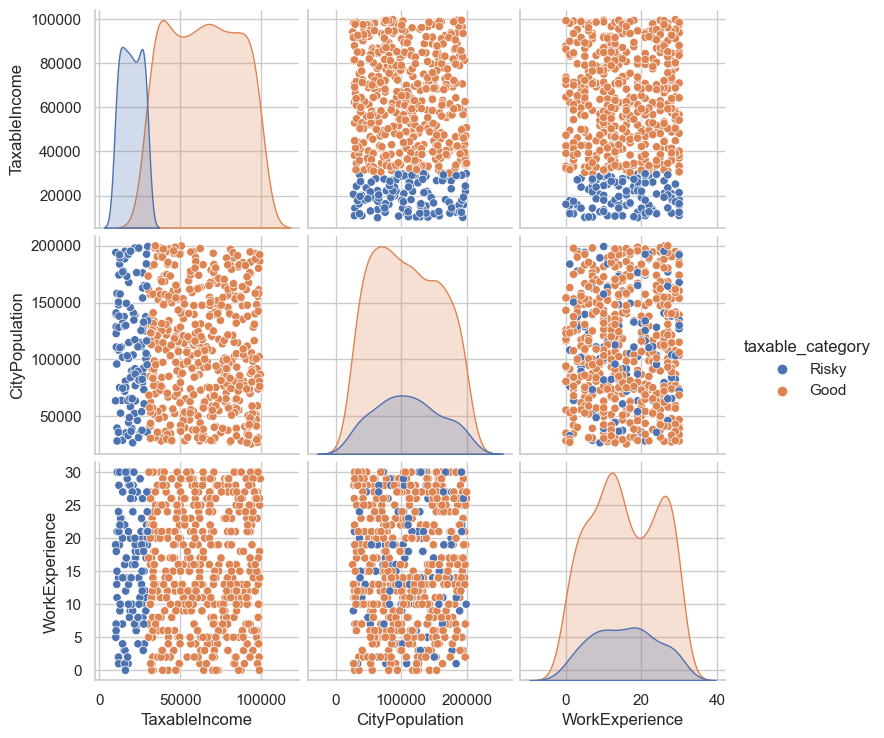

In [23]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=Fraud_data,hue='taxable_category')

#### Feature Engineering

In [24]:
Fraud_data.drop(columns=['TaxableIncome'],inplace=True)

In [25]:
Fraud_data.columns

Index(['Undergrad', 'MaritalStatus', 'CityPopulation', 'WorkExperience',
       'Urban', 'taxable_category'],
      dtype='object')

In [26]:
# Rename the 'taxable_category' column to 'Tax'
Fraud_data=Fraud_data.rename(columns={'taxable_category': 'Tax'})

In [27]:
Fraud_data.head(2)

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Tax
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good


In [28]:
# Perform one-hot encoding
Fraud_data=pd.get_dummies(Fraud_data,columns=['Undergrad','MaritalStatus','Urban'])

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder=LabelEncoder()

# Apply label encoding to the categorical column
Fraud_data['Tax']=label_encoder.fit_transform(Fraud_data['Tax'])

In [30]:
Fraud_data.columns

Index(['CityPopulation', 'WorkExperience', 'Tax', 'Undergrad_NO',
       'Undergrad_YES', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Separate the features (X) and the target variable (y)
X=Fraud_data[['CityPopulation', 'WorkExperience', 'Undergrad_NO',
       'Undergrad_YES', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Urban_NO', 'Urban_YES']]
y=Fraud_data['Tax']

# Initialize a Decision Tree Classifier
clf=DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importances
feature_importance=clf.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df=pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df=feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,CityPopulation,0.617609
1,WorkExperience,0.153527
5,MaritalStatus_Married,0.060593
6,MaritalStatus_Single,0.040791
7,Urban_NO,0.040264
2,Undergrad_NO,0.023683
8,Urban_YES,0.021841
4,MaritalStatus_Divorced,0.021023
3,Undergrad_YES,0.020670


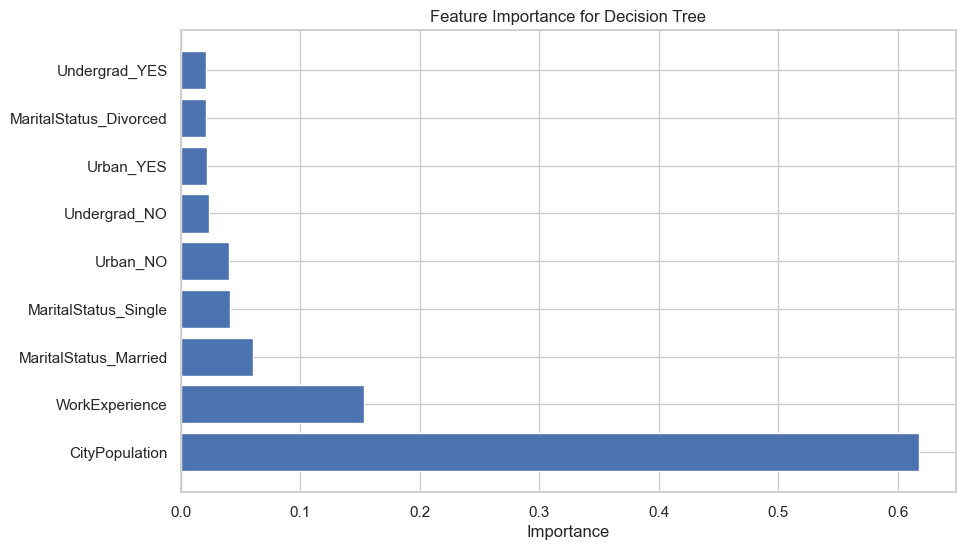

In [32]:
# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Decision Tree')
plt.show()

In [33]:
model_data=Fraud_data[['CityPopulation', 'WorkExperience', 'Tax', 'Undergrad_NO',
       'Undergrad_YES', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Urban_NO', 'Urban_YES']]

#### Model Building,Training & Evaluation

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

In [35]:
x=model_data.drop('Tax',axis=1)
y=model_data['Tax']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
x_train.shape,y_train.shape

((480, 9), (480,))

In [38]:
x_test.shape,y_test.shape

((120, 9), (120,))

In [39]:
model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=10)
model.fit(x_train,y_train)
train_predicted=model.predict(x_train)

In [40]:
confusion_matrix(y_train,train_predicted)

array([[380,   0],
       [ 95,   5]], dtype=int64)

In [41]:
print(classification_report(y_train,train_predicted))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       380
           1       1.00      0.05      0.10       100

    accuracy                           0.80       480
   macro avg       0.90      0.53      0.49       480
weighted avg       0.84      0.80      0.72       480



In [42]:
test_predicted=model.predict(x_test)

In [43]:
confusion_matrix(y_test,test_predicted)

array([[92,  4],
       [24,  0]], dtype=int64)

In [44]:
print(classification_report(y_test,test_predicted))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        96
           1       0.00      0.00      0.00        24

    accuracy                           0.77       120
   macro avg       0.40      0.48      0.43       120
weighted avg       0.63      0.77      0.69       120



In [45]:
features=x.columns.values

In [46]:
features

array(['CityPopulation', 'WorkExperience', 'Undergrad_NO',
       'Undergrad_YES', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Urban_NO', 'Urban_YES'], dtype=object)

In [47]:
classes=['0','1']

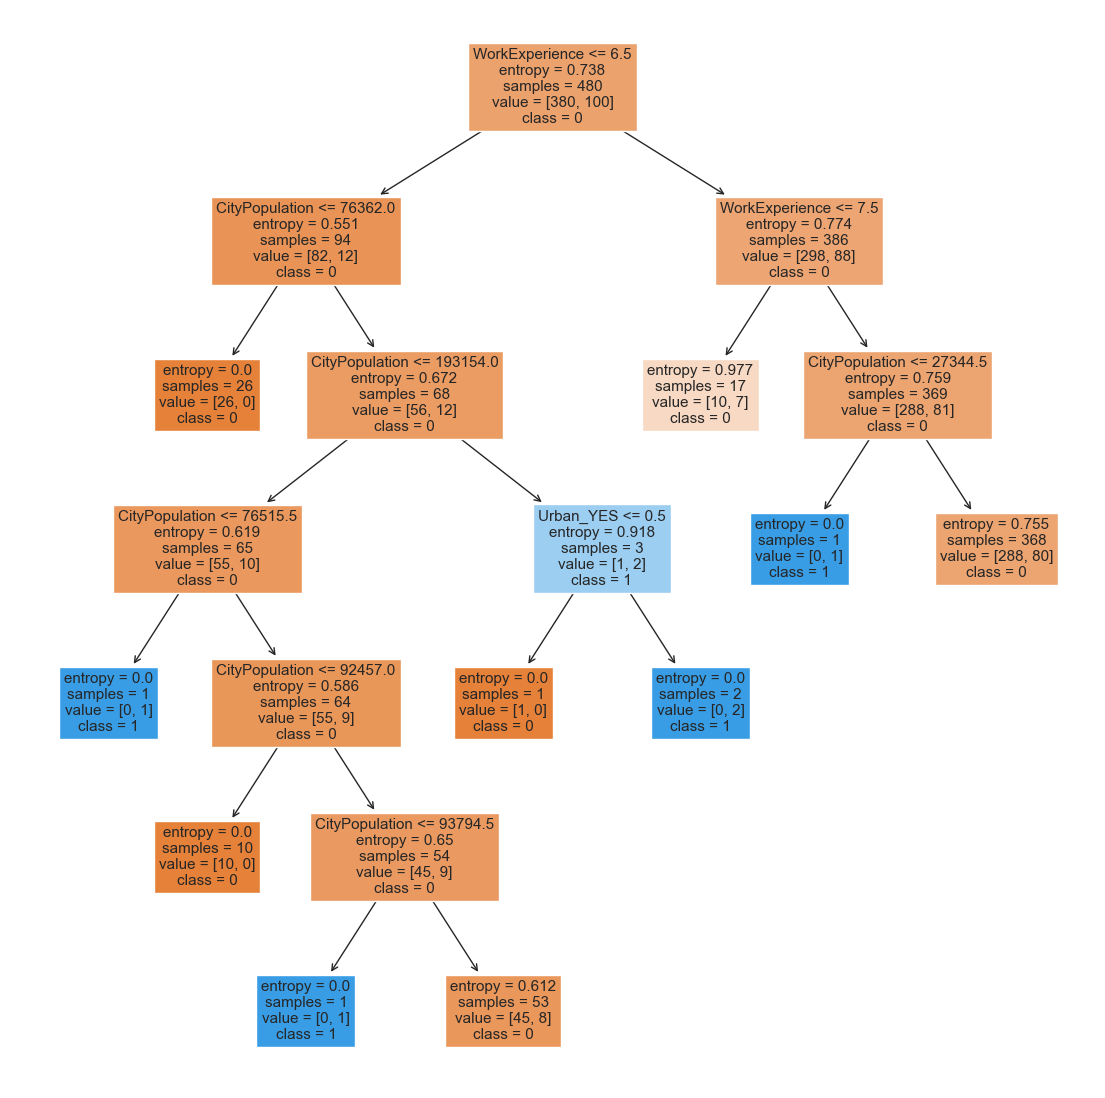

In [48]:
fig,axes=plt.subplots(figsize=(14,14))
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()